<a href="https://colab.research.google.com/github/kakkarsaab/Titanic_Data_Analysis/blob/master/Titanic_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis on Titanic Dataset**

***INTRODUCTION***

“**RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912**, after colliding with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. RMS Titanic was the largest ship afloat at the time it entered service.”


One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Let us start importing the common libraries which will be used

in the datset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


*Now I will read titanic dataset using Pandas read_csv method
and explore first five rows of the dataset*

In [0]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df.shape

(891, 12)

**DATA DESCRIPTION**


1. **survival :** 	Survival , 0 = No, 1 = Yes

2. **pclass :** 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

3. **sex :**	Sex

4. **Age :**	Age in years

5. **sibsp :**	 siblings / spouses aboard the Titanic

6. **parch :**	# of parents / children aboard the Titanic

7. **ticket :**	Ticket number	

8. **fare:**	Passenger fare	

9. **cabin :**	Cabin number	

10. **embarked :**	Port of Embarkation	
        C = Cherbourg
        Q = Queenstown
        S = Southampton

   **VARIABLE NOTES**
   
**pclass :**  A proxy for socio-economic status (SES)

   **1st** = Upper

**2nd** = Middle

**3rd** = Lower

**age :** Age is fractional if less than 1.

**sibsp**: The dataset defines family relations in this way

**Sibling** = brother, sister, stepbrother, stepsister

**Spouse** = husband, wife (mistresses and fiancés were ignored)

**parch :** The dataset defines family relations in this way

**Parent** = mother, father

**Child** = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

*Now Let us see the summary of The Dataset.*



In [0]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the above summary of the dataset we can see that the maximum no of passengers travelling on the ship were **891** , maximum passenger class is **3**(upper, middle, lower). The maximum age of the person is **80** years.

Also we note that  mean of survived column is **0.38**, but since this is not complete dataset we cannot conclude on that.

Count for ‘Age’ column is **714**, it means dataset has some missing values.

Columns like **PassengerId, Name, Ticket and Cabin** can be dropped off as they would not be making any differnce in the analysis of the data.

So, now we have this:-

In [0]:
data_cleaned = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


*Now Let's check If there is any null value in the dataset or not*

In [0]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1).describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
df.query('Age==80')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


We can see that there is one person with passenegerId 631 whose age is **80** years. The name of the person is  Mr. Algernon Henry Wilson and his Cabin no is A23

In [0]:
data_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**UNIVARIATE ANALYSIS**

We will be analysing the distribution of the data.

**Counting the passengers survived**

In [0]:
df[['Survived']].describe()

,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


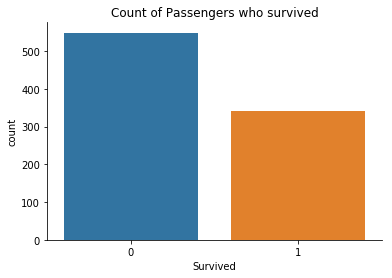

In [0]:
sns.countplot('Survived', data=df)
plt.title('Count of Passengers who survived')
sns.despine()


**Age wise distribution of Passengers Aboard the Titanic**

In [0]:
df[['Age']].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


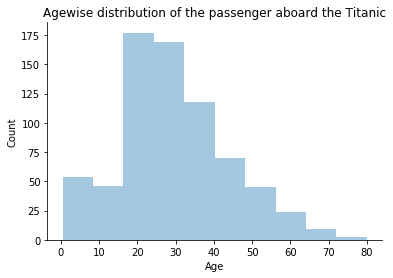

In [0]:
sns.distplot(df['Age'].dropna(), bins = 10, kde= False)
plt.ylabel('Count')
plt.title('Agewise distribution of the passenger aboard the Titanic')
sns.despine()


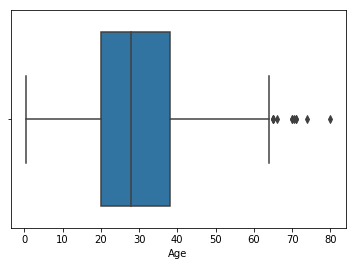

In [0]:
sns.boxplot(df['Age'])

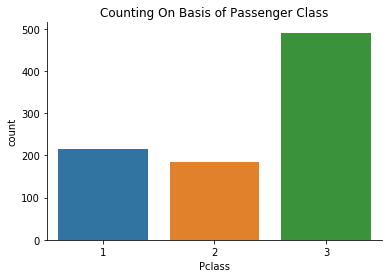

In [0]:
sns.countplot(x ='Pclass', data=df) 
plt.title('Counting On Basis of Passenger Class')
sns.despine()

From the above graph we can observe that the maximum no of passengers are having 3rd Class Tickets .

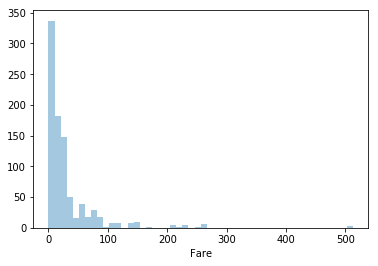

In [0]:
sns.distplot(df['Fare'],kde=False)

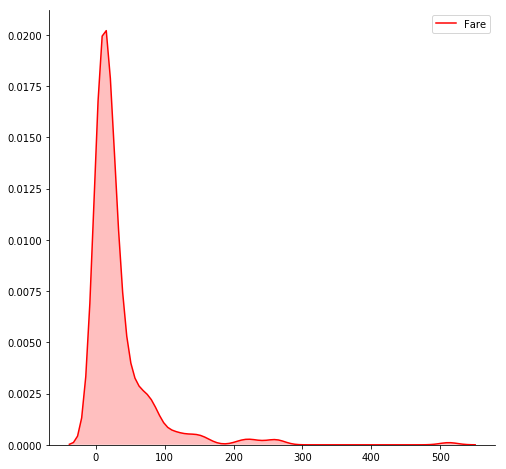

In [0]:
plt.subplots(figsize=(8,8))
sns.kdeplot(df['Fare'],color='red',shade=True)
sns.despine()

In [0]:
df[['Fare']].describe()


,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


Let us check the embarkment of the passengers.

C = **Cherbourg**

Q = **Queenstown**

S = **Southampton**

In [0]:
df[['Embarked']].describe()

,Embarked
count,889
unique,3
top,S
freq,644


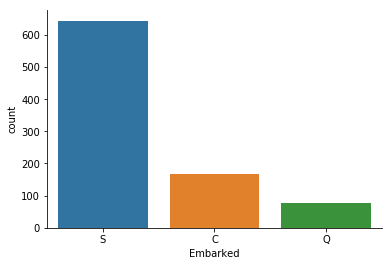

In [0]:
sns.countplot(x = 'Embarked', data = df)
sns.despine()

   **Correlation between Variables**
   
   
It will be good to see how the variables are correalted before we jump to bivariate analysis as it will surely help us in further process.

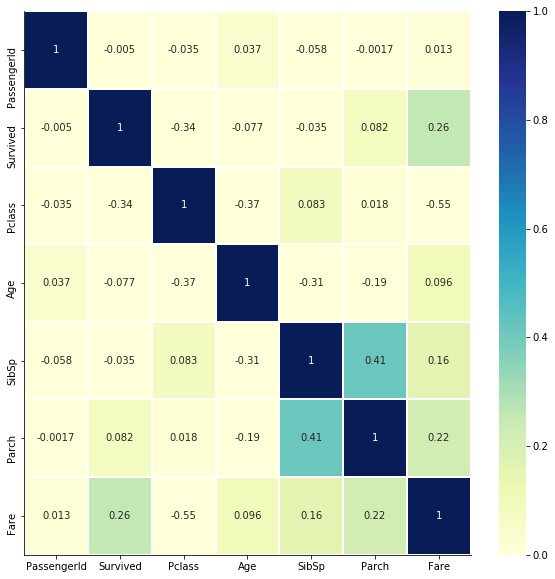

In [0]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), vmin=0, vmax=1,annot=True, cmap="YlGnBu", linewidth=1, linecolor ='white')
sns.despine()

**Bivariate Analysis**

Now let us do the Bivariate Analysis.

**AGE- SEX**

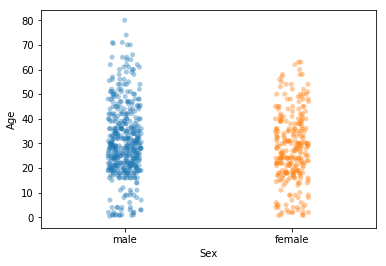

In [0]:
sns.stripplot(x= 'Sex', y='Age', data = df, jitter = True, alpha = 0.4)

This plot tells us about the number of males and females of different age.

In [0]:
df[['Sex', 'Age']].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


**PASSENGER CLASS- SURVIVED**

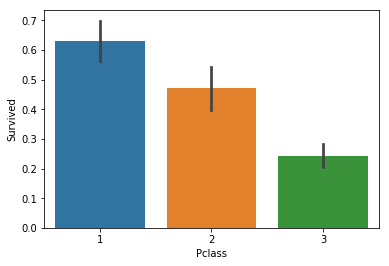

In [0]:
sns.barplot(x= 'Pclass', y='Survived', data = df)

In [0]:
df[['Pclass','Survived']].describe()

,Pclass,Survived
count,891.000000,891.000000
mean,2.308642,0.383838
std,0.836071,0.486592
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,3.000000,1.000000
max,3.000000,1.000000


**PCLASS - FARE**


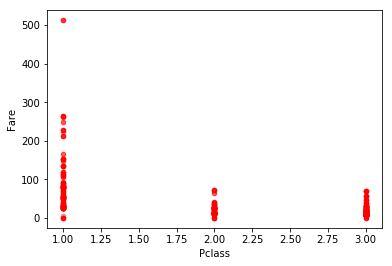

In [0]:
df.plot.scatter(y='Fare', x='Pclass' , color = 'red', animated = True, alpha = 0.4)

In [0]:
df[['Pclass', 'Fare']].describe()

,Pclass,Fare
count,891.000000,891.000000
mean,2.308642,32.204208
std,0.836071,49.693429
min,1.000000,0.000000
25%,2.000000,7.910400
50%,3.000000,14.454200
75%,3.000000,31.000000
max,3.000000,512.329200


This plot between the Fare and Pclass tells us that the passengers with the Passengers with the Upper Class has the highest fare.

**FARE - EMBARKED**

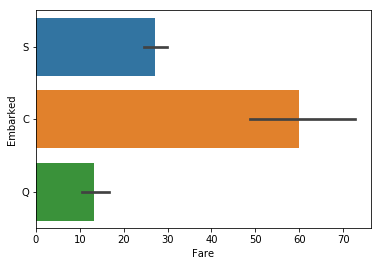

In [0]:
sns.barplot(x='Fare', y='Embarked', data=df)

The mean fare was the highest for passengers from Cherbourg.

**SEX - SURVIVED**


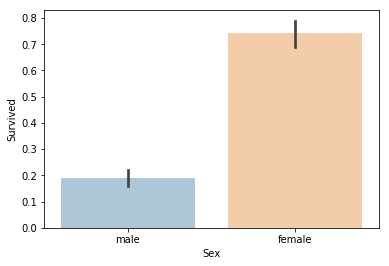

In [0]:
sns.barplot(x='Sex', y='Survived', data = df, alpha =0.4)

**MULTIVARIATE ANALYSIS**

Let us do some more analysis on the dataset

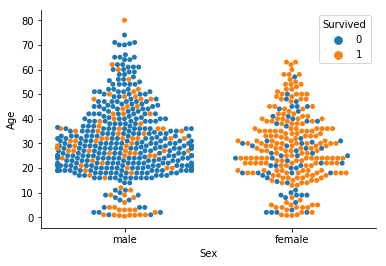

In [0]:
sns.swarmplot('Sex','Age','Survived',data= df)
sns.despine()

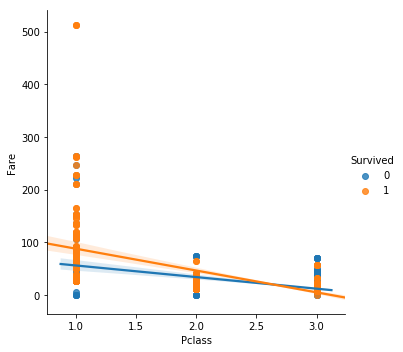

In [0]:
sns.lmplot('Pclass','Fare', hue ='Survived',data = df)

From the above plot we get to know that the passengers with the Upper Class has the highest Chances Of Surviving . 0->**No** , 1-> **Yes**. 

**CONCLUSION**

From the exploratory data analysis from the Titanic dataset we say that that

1. Females have higher chances of Survival.
2.  The Class(Economic Status) Of the passenegers plays a vital role in their survival.
3.From the univariate plots, we can observe that there was more people on the Titanic from Southampton. But, from the  bivariate plots the mean survival was higher for individuals from Cherbourg.